In [4]:
import pandas as pd
import numpy as np

#loading the dataset
df = pd.read_csv("netflix_titles.csv")

#Testing the dataset by printing out the first 5 records
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#Checking the dataset for missing values
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
df.fillna({"director":"Not Available"}, inplace=True)
df.fillna({"cast":"Not Available"}, inplace=True)
df.fillna({"country":"Not Available"}, inplace=True)
df.fillna({"rating":"Unknown"}, inplace=True)
df.fillna({"duration":"Unknown"}, inplace=True)

#I'm going to drop the records with empty date_added, since its only 10 records
df.dropna(subset=["date_added"], inplace=True)


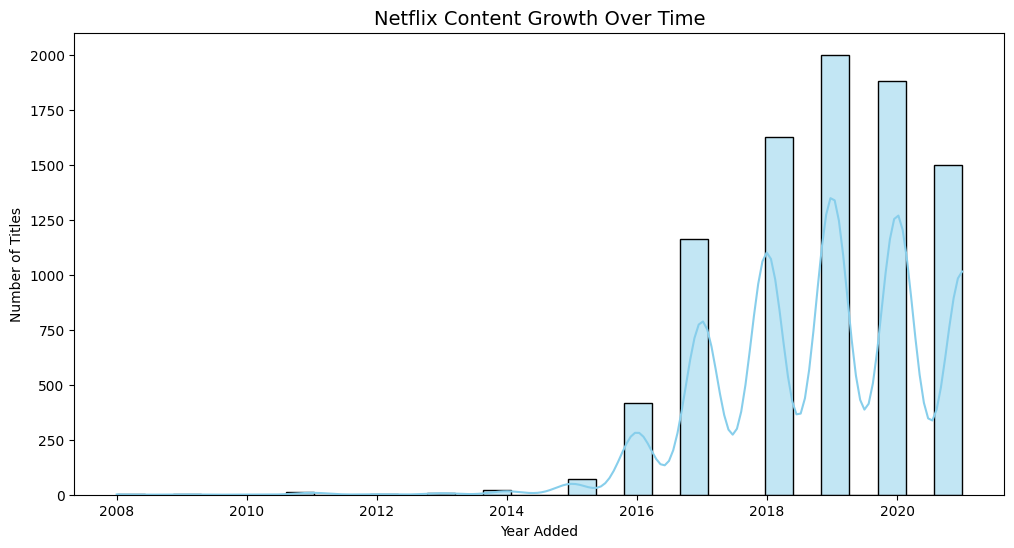

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Netflix growth over time in terms of titles released per year.
#First I'm going to extract the year from the date_added field
df["date_added"] = pd.to_datetime(df["date_added"], format="%B %d, %Y", errors="coerce")
df["year_added"] = df["date_added"].dt.year


plt.figure(figsize=(12, 6))
sns.histplot(df["year_added"], bins=30, kde=True, color="skyblue")
plt.title("Netflix Content Growth Over Time", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

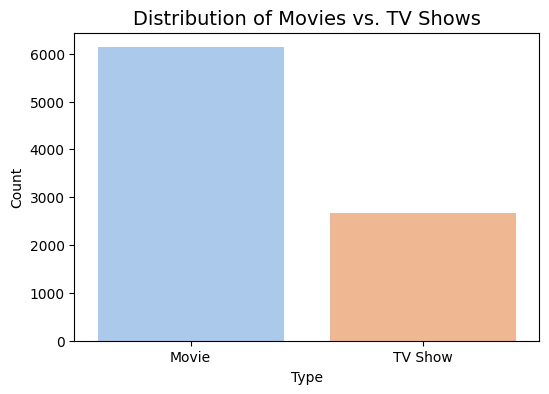

In [8]:
#The ratio between movies and TV shows
plt.figure(figsize=(6, 4))
sns.countplot(x="type", data=df, hue ="type", palette="pastel", legend = False)
plt.title("Distribution of Movies vs. TV Shows", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

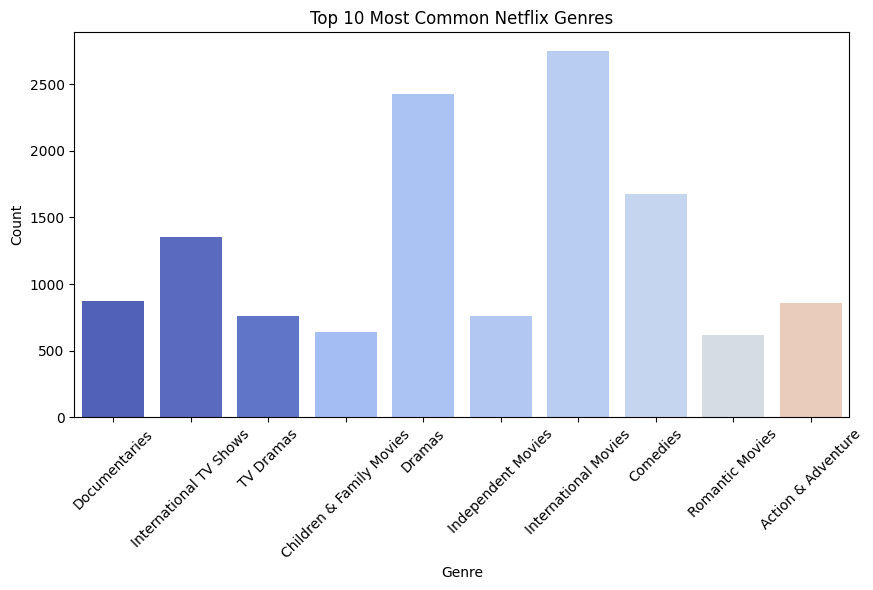

In [12]:
#Analyzing the most popular genres on Netflix

from collections import Counter

# Split and count genres
genres = df["listed_in"].dropna().str.split(", ")
genre_counts = Counter([genre for sublist in genres for genre in sublist])

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

# Plot the top 10 genres
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_df["Genre"][:10], y=genre_df["Count"][:10], hue =genre_df["Genre"], palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


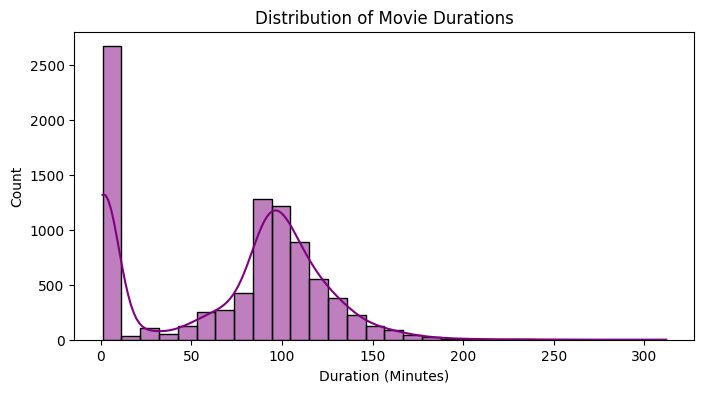

No TV show data available for plotting.


<Figure size 800x400 with 0 Axes>

In [31]:
#Analyzing the average duration of Netflix Content

#Separating Movies and TV Shows
df["duration"] = df["duration"].astype(str) #Earlier empty duration was set to unknown which is a string
df["duration_minutes"] = df["duration"].str.extract(r"(\d+)").astype(float)
df["num_seasons"] = df["num_seasons"].replace({'Seasons': 'season'}, regex=True)
df["num_seasons"] = df["duration"].apply(lambda x: int(x.split()[0]) if "season" in x.lower() else None)


plt.figure(figsize=(8, 4))
sns.histplot(df["duration_minutes"].dropna(), bins=30, kde=True, color="purple")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

#Analyze TV shows separately
plt.figure(figsize=(8, 4))
if df["num_seasons"].dropna().shape[0] > 0:  
    sns.histplot(df["num_seasons"].dropna(), bins=10, kde=True, color="blue")
    plt.title("Distribution of TV Show Seasons")
    plt.xlabel("Number of Seasons")
    plt.ylabel("Count")
    plt.show()
else:
    print("No TV show data available for plotting.")

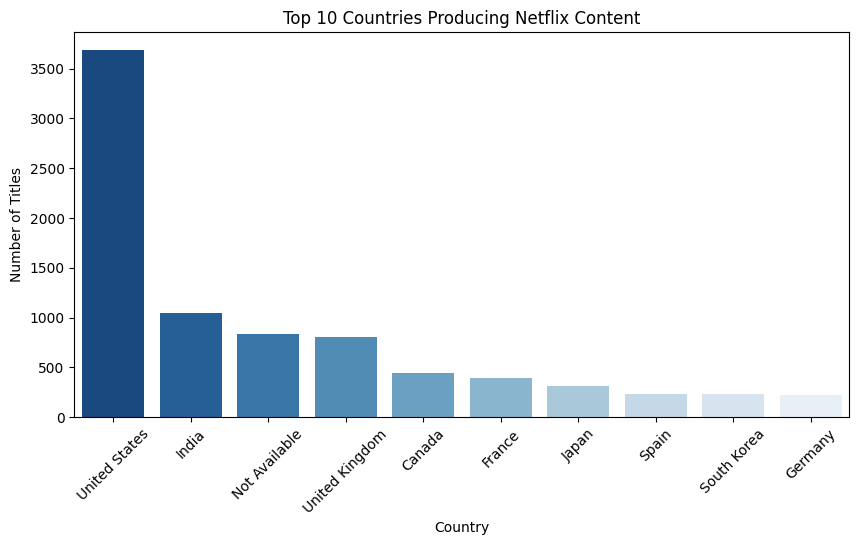

In [16]:
#Top 10 countries releasing content on Netflix

# Split and count country occurrences, country field contain multiple values for some records in this dataset
country_counts = df["country"].dropna().str.split(", ").explode().value_counts()

# Plot the top 10
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values, hue = country_counts[:10].index, palette="Blues_r", legend = False)
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


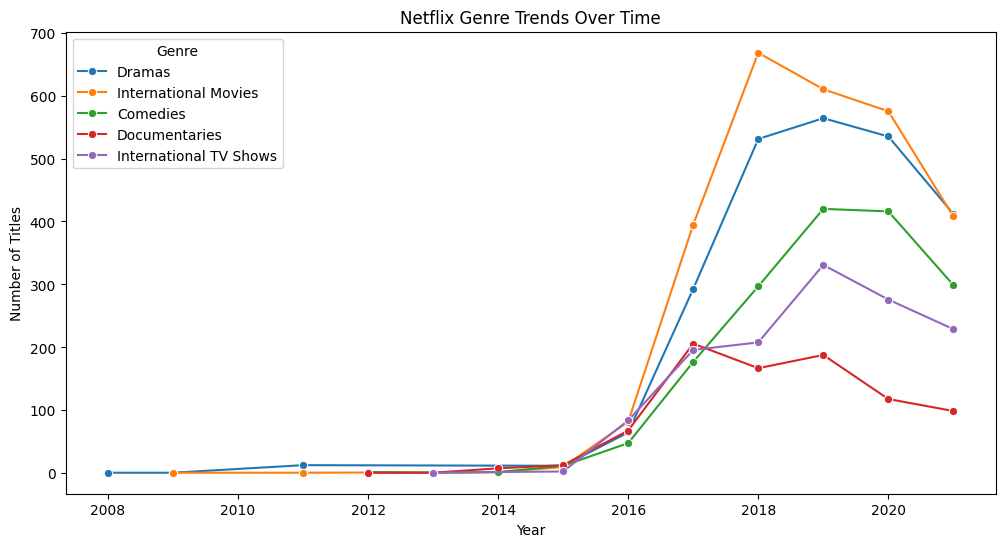

In [15]:
#How Different Genres Have Evolved Over Time

df_exploded = df.assign(genre=df["listed_in"].str.split(", ")).explode("genre")

genre_trends = df_exploded.groupby(["year_added", "genre"]).size().reset_index(name="count")

#Top 5 most common genres
top_genres = df_exploded["genre"].value_counts().head(5).index

# Filter dataset for only the top 5 genres
filtered_genres = genre_trends[genre_trends["genre"].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_genres, x="year_added", y="count", hue="genre", marker="o")

plt.title("Netflix Genre Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()
